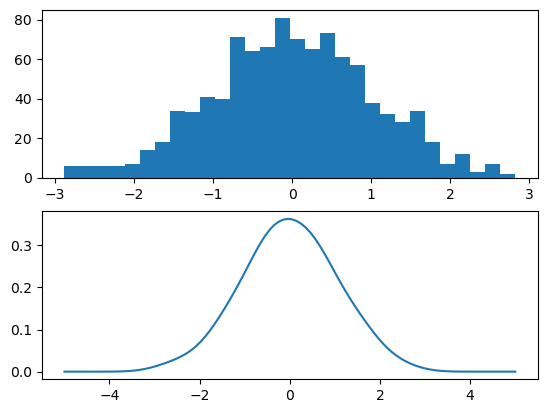

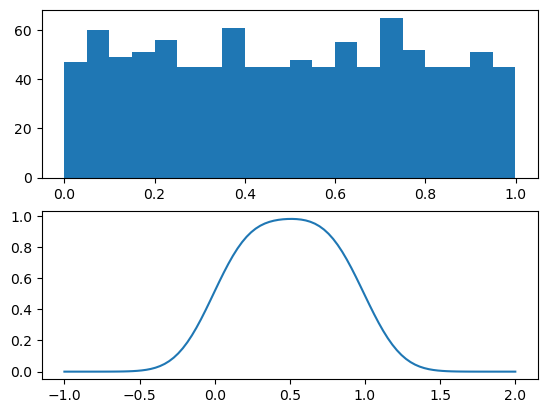

In [2]:
import numpy as np
import matplotlib.pyplot as plt
def ksdensity(data, width=0.3):
    def ksd(x_axis):
        def n_pdf(x, mu=0., sigma=1.): # normal pdf
            u = (x - mu) / abs(sigma)
            y = (1 / (np.sqrt(2 * np.pi) * abs(sigma)))
            y *= np.exp(-u * u / 2)
            return y
        prob = [n_pdf(x_i, data, width) for x_i in x_axis]
        pdf = [np.average(pr) for pr in prob] # each row is one x value
        return np.array(pdf)
    return ksd
# Plot normal distribution
fig, ax = plt.subplots(2)
x = np.random.randn(1000)
ax[0].hist(x, bins=30) # number of bins
ks_density = ksdensity(x, width=0.4)

# np.linspace(start, stop, number of steps)
x_values = np.linspace(-5., 5., 100)
ax[1].plot(x_values, ks_density(x_values))

# Plot uniform distribution
fig2, ax2 = plt.subplots(2)
x = np.random.rand(1000)
ax2[0].hist(x, bins=20)
ks_density = ksdensity(x, width=0.2)
x_values = np.linspace(-1., 2., 100)
ax2[1].plot(x_values, ks_density(x_values))
plt.show()

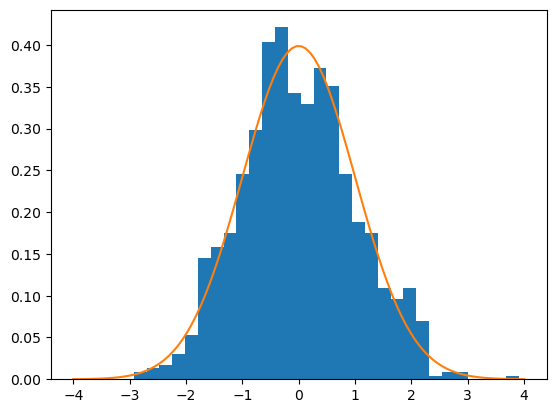

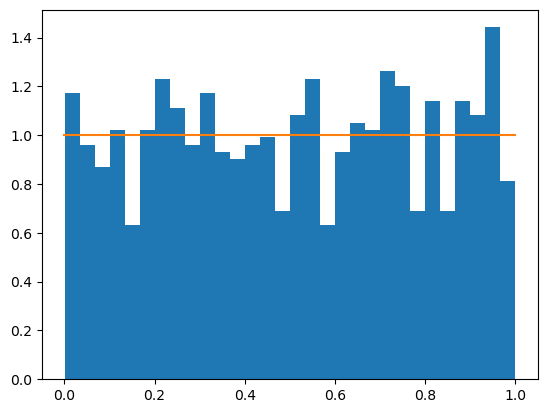

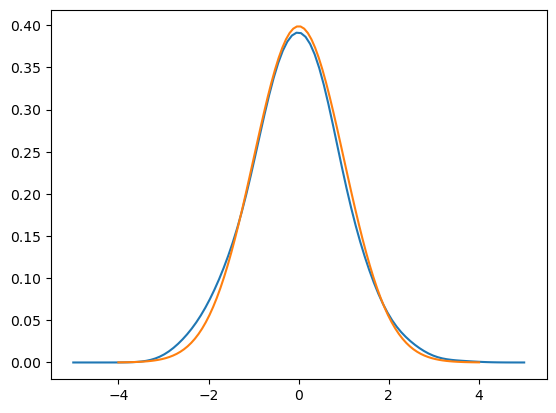

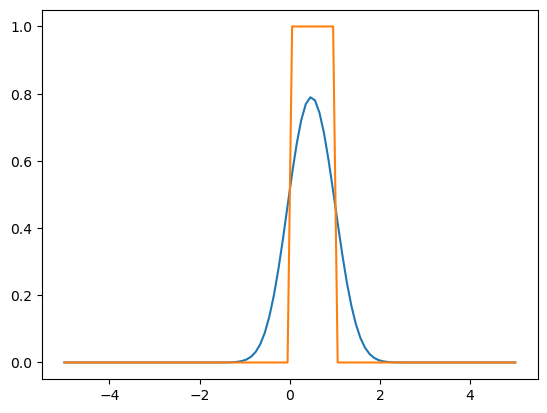

In [23]:
import scipy.stats as stats
x = np.random.normal(0,1,1000)
plt.hist(x, bins =30, density = True)

mu = 0
variance = 1

g = np.linspace(-4 , +4, 100)
plt.plot(g, stats.norm.pdf(g, mu, np.sqrt(variance)))
plt.show()


x = np.random.rand(1000)
plt.hist(x, bins =30, density =True)
g = np.linspace(0,1,100)
plt.plot(g, stats.uniform.pdf(g))
plt.show()

x = np.random.normal(0,1,1000)
ks_density = ksdensity(x, width=0.4)
x_values = np.linspace(-5., 5., 100)
plt.plot(x_values, ks_density(x_values))

mu = 0
variance = 1

g = np.linspace(-4 , +4, 100)
plt.plot(g, stats.norm.pdf(g, mu, np.sqrt(variance)))
plt.show()


x = np.random.rand(1000)
ks_density = ksdensity(x, width=0.4)
x_values = np.linspace(-5., 5., 100)
plt.plot(x_values, ks_density(x_values))
g = np.linspace(-5,5,100)
plt.plot(g, stats.uniform.pdf(x_values))
plt.show()







In [29]:
def plot_uni(N, bins =30):
    data = np.random.rand(N)
    mean = N/bins
    dev = np.sqrt(N*(1/bins)*(1-1/bins))
    plt.hist(data, bins = bins, density =False)
    plt.axhline(y = mean, color ='r', label = "Theoretical mean")
    plt.axhline(y = mean + 3*dev, color ='r', label = "+3 sd")
    plt.axhline(y = mean - 3*dev, color ='r', label = "-3 sd")
    plt.title("N = "+str(N))
    plt.show()


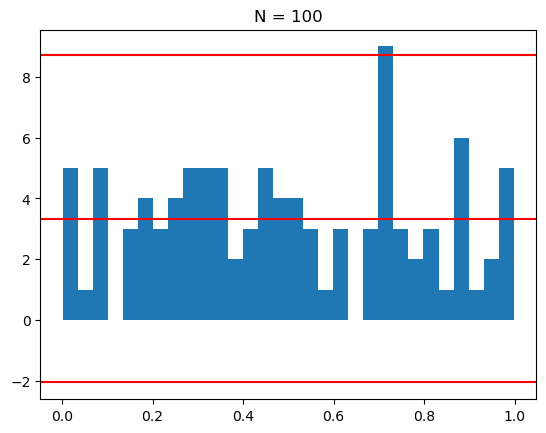

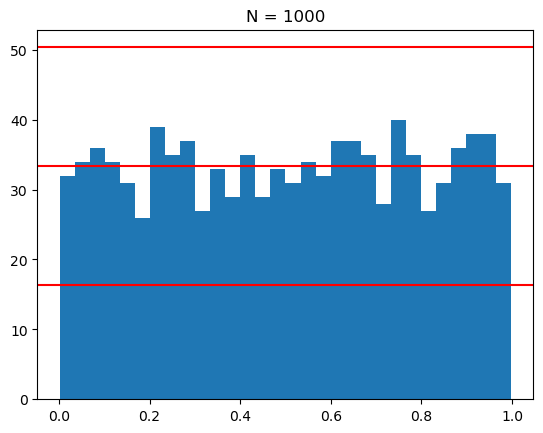

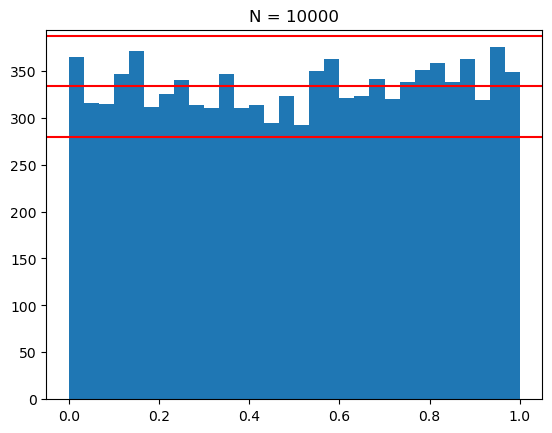

In [30]:
#second part of one

plot_uni(100)
plot_uni(1000)
plot_uni(10000)

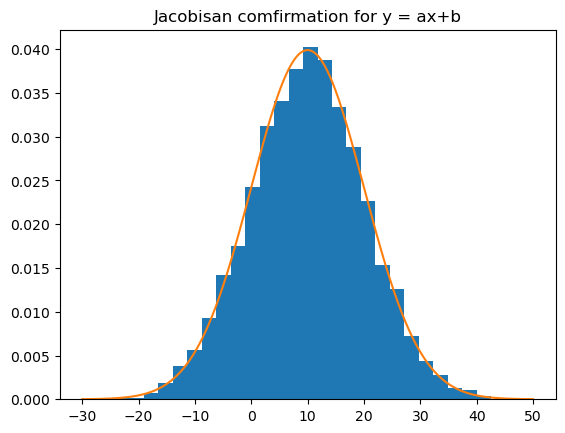

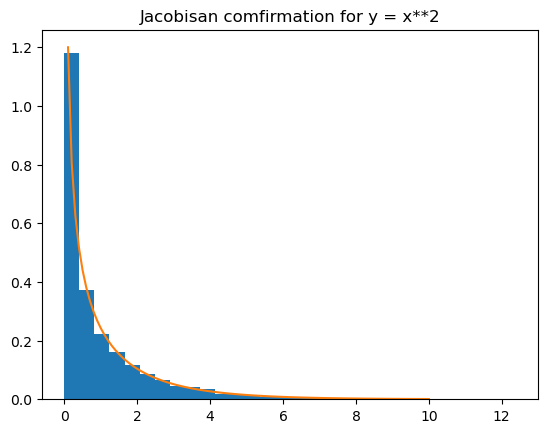

In [58]:
#Second task
x = np.random.randn(10000)
a, b = 10, 10

y = a*x + b
plt.hist(y, bins = 30, density =True)

g = np.linspace(b-4*a , b+4*a, 1000)
data = (1/a)*stats.norm.pdf((g-b)/a)
plt.plot(g, data)
plt.title('Jacobisan comfirmation for y = ax+b')
plt.show()


x = np.random.randn(10000)

y = x**2
plt.hist(y, bins = 30, density =True)

g = np.linspace(0.1 , +10, 100)
data = (1/np.sqrt(g))*stats.norm.pdf(np.sqrt(g))
plt.plot(g, data)
plt.title('Jacobisan comfirmation for y = x**2')
plt.show()









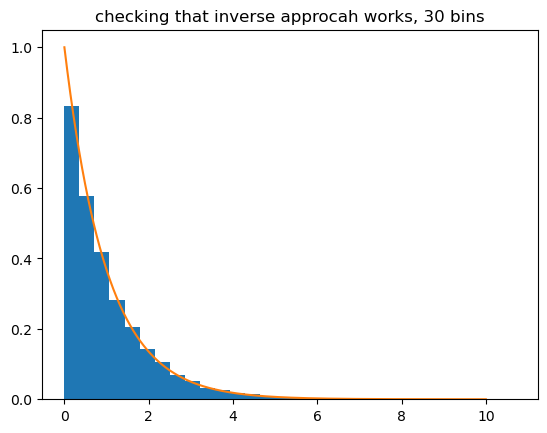

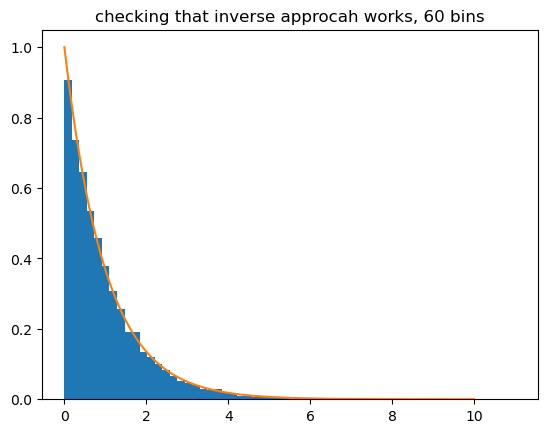

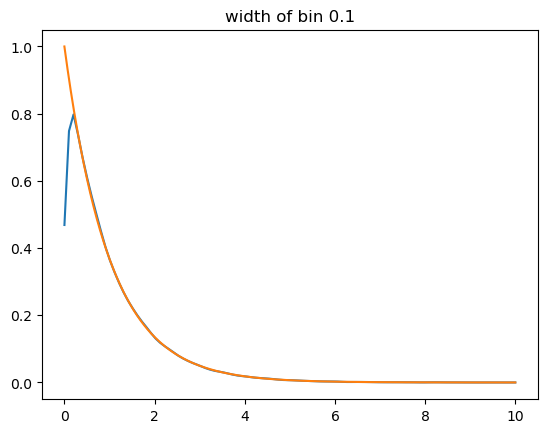

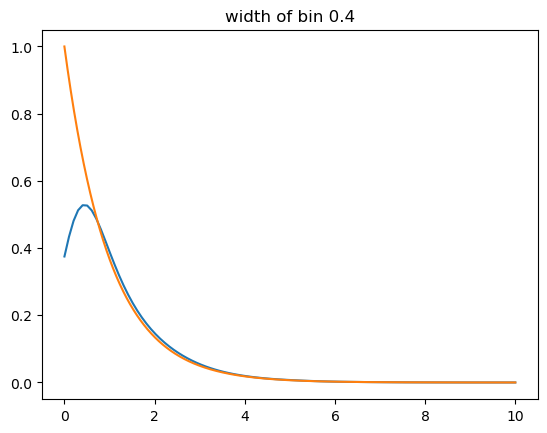

In [74]:
#Third task
x = np.random.rand(10000)

y = -1*np.log(1-x)
plt.hist(y, bins = 30, density =True)

g = np.linspace(0 , +10, 1000)
data = stats.expon.pdf(g)
plt.plot(g, data)
plt.title('checking that inverse approcah works, 30 bins')
plt.show()

x = np.random.rand(10000)

y = -1*np.log(1-x)
plt.hist(y, bins = 60, density =True)

g = np.linspace(0 , +10, 1000)
data = stats.expon.pdf(g)
plt.plot(g, data)
plt.title('checking that inverse approcah works, 60 bins')
plt.show()



#Third task
x = np.random.rand(100000)

y = -1*np.log(1-x)
ks_density = ksdensity(y, width=0.1)
x_values = np.linspace(0.001, 10., 100)
plt.plot(x_values, ks_density(x_values))

g = np.linspace(0 , +10, 10000)
data = stats.expon.pdf(g)
plt.plot(g, data)
plt.title('width of bin 0.1')
plt.show()

x = np.random.rand(100000)

y = -1*np.log(1-x)
ks_density = ksdensity(y, width=0.4)
x_values = np.linspace(0.001, 10., 100)
plt.plot(x_values, ks_density(x_values))

g = np.linspace(0 , +10, 10000)
data = stats.expon.pdf(g)
plt.plot(g, data)
plt.title('width of bin 0.4')
plt.show()

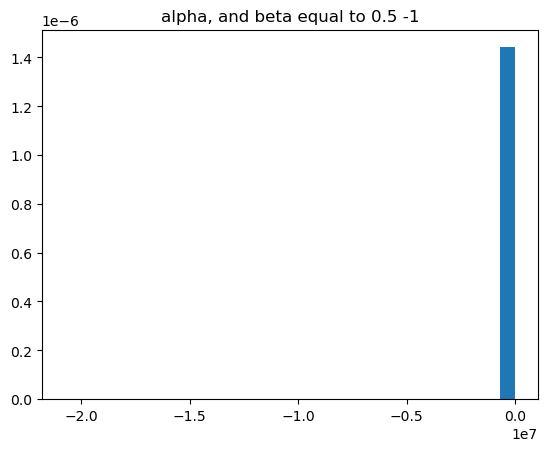

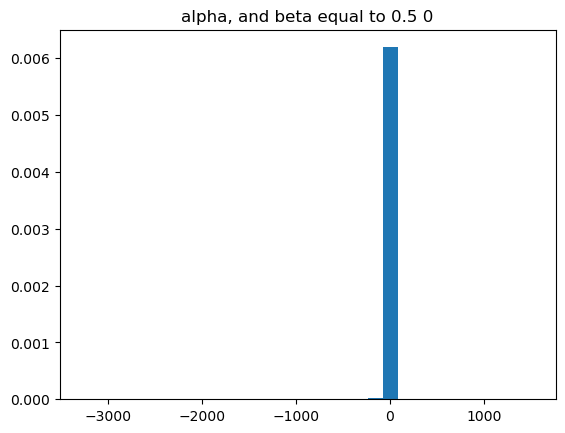

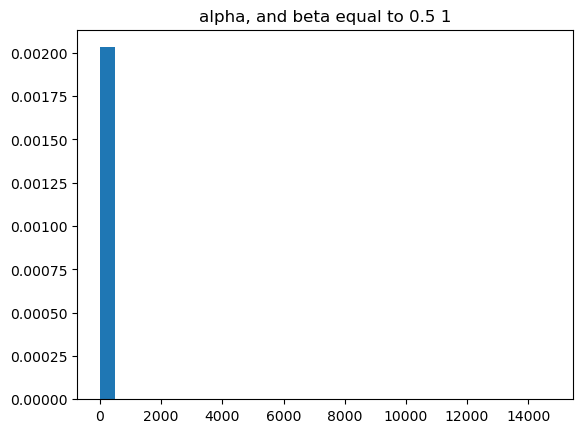

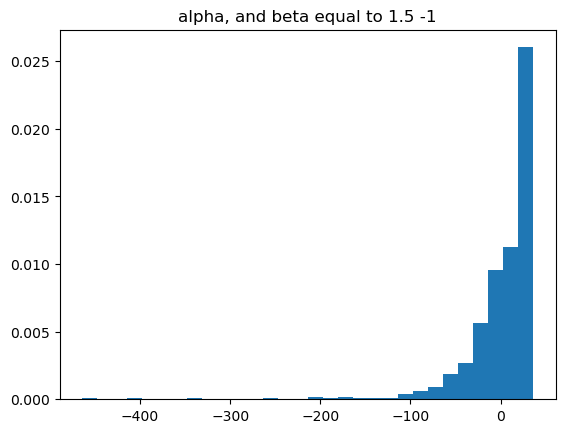

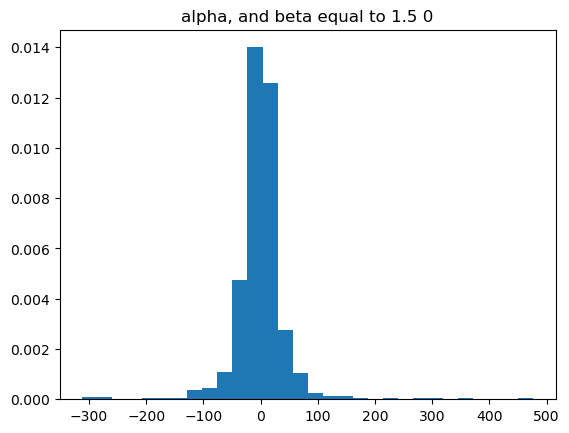

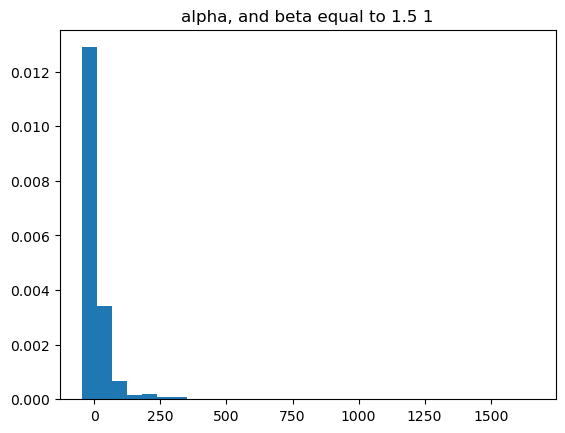

In [67]:
#fourth question
def fourth(alpha, beta, N, bins):
    b = (1/alpha)*np.arctan(beta*np.tan(alpha*0.5*np.pi))
    s = (a+beta**2 * (np.tan(np.pi*0.5*alpha)))**(1/(2*alpha))

    u = np.random.uniform(-np.pi*0.5, 0.5*np.pi, N)
    v = np.random.exponential( N)

    x = s*(np.sin(alpha*(u+b))/((np.cos(u))**(1/alpha)))*(((np.cos(u-alpha*(u+b))/v)**((1-alpha)/alpha)))
    plt.hist(x, bins = bins, density =True)
    plt.title('alpha, and beta equal to '+str(alpha)+' '+str(beta))
    plt.show()
    
fourth(0.5, -1, 1000, 30)
fourth(0.5, 0, 1000, 30)
fourth(0.5, 1, 1000, 30)
fourth(1.5, -1, 1000, 30)
fourth(1.5, 0, 1000, 30)
fourth(1.5, 1, 1000, 30)


    
    